In [27]:
import numpy as np
import matplotlib.pyplot as plt
import time

glider = np.array([
    [0, 1, 0],
    [0, 0, 1],
    [1, 1, 1]
])

blinker = np.array([
    [1, 1, 1]
])

toad = np.array([
    [0, 1, 1, 1],
    [1, 1, 1, 0]
])

block = np.array([
    [1, 1],
    [1, 1]
])

def evolve(field):
    size = field.shape[0]
    next_field = np.zeros_like(field)

    for i in range(1, size - 1):
        for j in range(1, size - 1):
            neighbors = np.sum(field[i-1:i+2, j-1:j+2]) - field[i, j]
            if field[i, j] == 1:
                next_field[i, j] = 1 if neighbors in [2, 3] else 0
            else:
                next_field[i, j] = 1 if neighbors == 3 else 0

    return next_field

In [28]:
class Sensor:
    def __init__(self, center_x, center_y, window=10):
        self.cx = center_x
        self.cy = center_y
        self.window = window
        self.log = []

    def observe(self, field):
        x1 = self.cx - self.window
        x2 = self.cx + self.window
        y1 = self.cy - self.window
        y2 = self.cy + self.window

        patch = field[x1:x2, y1:y2]
        alive = np.sum(patch)
        self.log.append(alive)

    def plot_activity(self):
        plt.plot(self.log)
        plt.xlabel("Time step")
        plt.ylabel("Alive cells")
        plt.title(f"Sensor @ ({self.cx},{self.cy}) Activity Log")
        plt.show()


In [29]:
def insert_seed(field, seed, x, y):
    sx, sy = seed.shape
    field[x:x+sx, y:y+sy] = seed

In [30]:
size = 100
field = np.zeros((size, size), dtype=int)

# Add known structures near sensors
insert_seed(field, glider, 20, 20)
insert_seed(field, toad, 50, 50)
insert_seed(field, block, 80, 80)


In [31]:
sensor1 = Sensor(20, 20, window=10)
sensor2 = Sensor(50, 50, window=10)
sensor3 = Sensor(80, 80, window=10)

sensors = [sensor1, sensor2, sensor3]


In [36]:
from matplotlib import animation
from IPython.display import HTML

def simulate_live(field, steps=100, interval=200, zoom_center=None, window=20):
    fig, ax = plt.subplots()

    if zoom_center:
        cx, cy = zoom_center
        def get_zoomed_frame(data):
            return data[cx-window:cx+window, cy-window:cy+window]
    else:
        get_zoomed_frame = lambda data: data

    img = ax.imshow(get_zoomed_frame(field), cmap='binary', interpolation='nearest')
    ax.axis('off')

    def update(step):
        nonlocal field
        field = evolve(field)
        img.set_data(get_zoomed_frame(field))
        return [img]

    ani = animation.FuncAnimation(fig, update, frames=steps, interval=interval, blit=True)
    plt.close()
    return HTML(ani.to_jshtml())

simulate_live(field.copy(), steps=100, interval=150, zoom_center=(30, 30), window=20)

simulate_live(field.copy(), steps=100, interval=100)

In [35]:
steps = 100
for step in range(steps):
    for sensor in sensors:
        sensor.observe(field)

    field = evolve(field)

simulate_live(field.copy(), steps=100)  # Optional static view after evolution


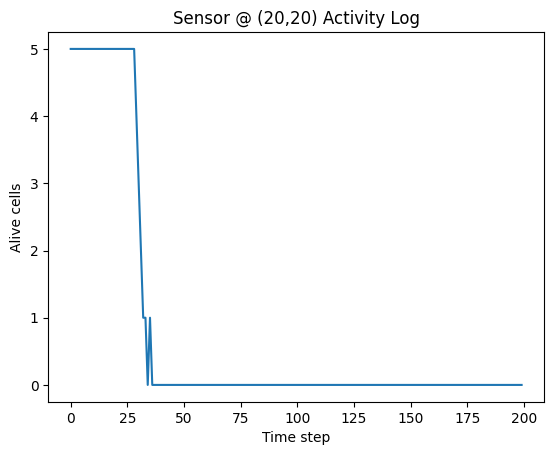

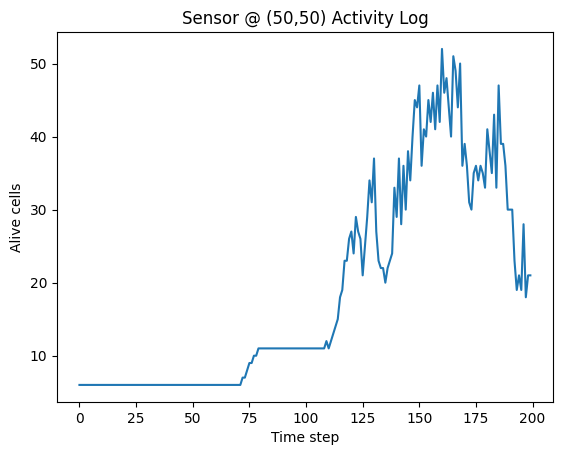

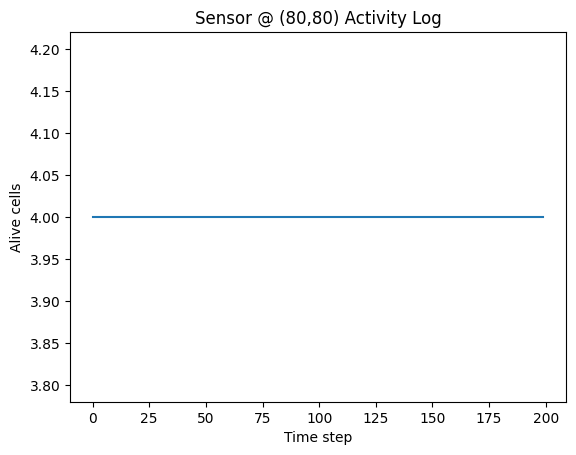

In [37]:
sensor1.plot_activity()
sensor2.plot_activity()
sensor3.plot_activity()